# PROJECT -  Late Entry Predictions

# Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Loading and Inspection of data

In [2]:
df=pd.read_csv('/Users/umesh/Desktop/spec2model/problems/PROBLEM_A/train_A.csv')

In [3]:
df.head()

,id,order_hour,day_of_week,restaurant_type,cuisine_type,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,weather_condition,traffic_density,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,is_promo_order,area_type,is_late
0,1,6,sunday,cafe,south_indian,10.7,55,1208.0,8,True,humid,moderate,3.6,3393.0,4.3,23.5,False,commercial,on_time
1,2,19,friday,casual_dining,dessert,1.1,78,172.0,12,True,light_rain,gridlock,2.5,2331.0,4.7,23.8,True,college_area,late
2,3,14,sunday,fine_dining,dessert,13.6,14,2314.0,2,True,clear,moderate,4.1,3393.0,3.1,23.0,False,college_area,late
3,4,10,monday,cloud_kitchen,south_indian,7.5,70,2754.0,2,True,clear,gridlock,4.6,2618.0,3.8,26.0,False,residential,late
4,5,7,thursday,fine_dining,chinese,7.2,47,789.0,9,True,light_rain,heavy,3.9,4121.0,4.4,28.9,False,residential,on_time


In [4]:
df['is_late'] = df['is_late'].map({
    'on_time' : 0,
    'late':1
})

In [5]:
df.sample(5)

,id,order_hour,day_of_week,restaurant_type,cuisine_type,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,weather_condition,traffic_density,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,is_promo_order,area_type,is_late
1426,1427,3,saturday,fine_dining,other,7.9,17,609.0,9,False,heavy_rain,moderate,4.4,4747.0,3.3,26.6,False,highway,1
2623,2624,7,tuesday,fast_food,other,8.6,79,1977.0,7,False,clear,heavy,3.3,4445.0,4.5,24.7,False,residential,0
1288,1289,0,thursday,casual_dining,indian,3.0,20,2585.0,12,False,humid,low,2.9,2805.0,2.6,27.5,False,highway,0
411,412,5,sunday,fast_food,biryani,9.6,64,1844.0,3,True,humid,moderate,4.3,429.0,3.5,24.5,True,commercial,0
2520,2521,5,tuesday,fast_food,indian,7.3,70,1176.0,3,False,fog,moderate,3.2,2053.0,3.7,19.5,False,commercial,0


In [6]:
X = df.drop(columns=['id','is_late'])
y = df['is_late']

In [7]:
# Checking the imbalance or not
y.value_counts(normalize=True)*100


is_late
0    60.5
1    39.5
Name: proportion, dtype: float64

## From above value counts we can clearly see that both the class in the ration of 60 : 40 . so the dataset is balanced

In [8]:
# Shape of the data
print(f'{X.shape[0]} rows and {X.shape[1]} features')

3000 rows and 17 features


In [176]:
# Checking the data type of the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_hour               3000 non-null   int64  
 1   day_of_week              3000 non-null   object 
 2   restaurant_type          3000 non-null   object 
 3   cuisine_type             3000 non-null   object 
 4   distance_km              2865 non-null   float64
 5   estimated_delivery_min   3000 non-null   int64  
 6   order_value_inr          2859 non-null   float64
 7   num_items                3000 non-null   int64  
 8   is_peak_hour             3000 non-null   bool   
 9   weather_condition        3000 non-null   object 
 10  traffic_density          3000 non-null   object 
 11  delivery_partner_rating  2849 non-null   float64
 12  delivery_partner_orders  2851 non-null   float64
 13  restaurant_rating        2852 non-null   float64
 14  restaurant_avg_prep_min 

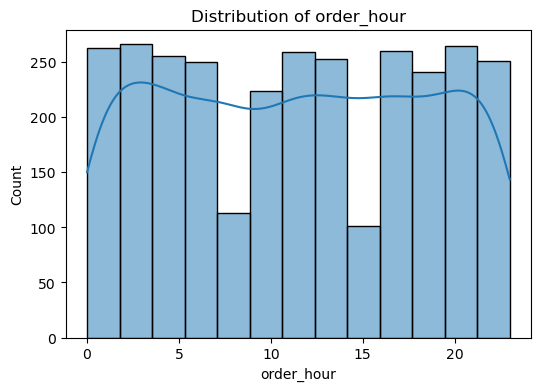

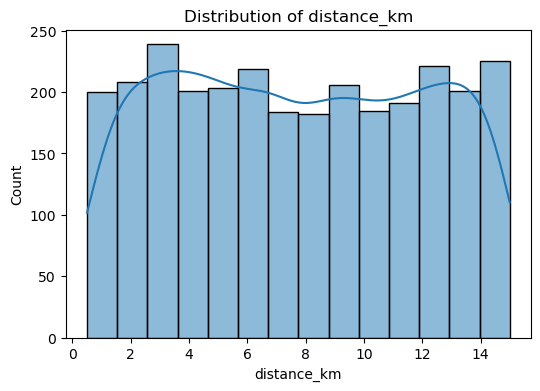

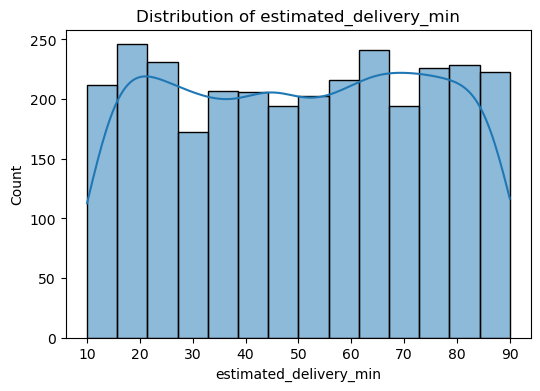

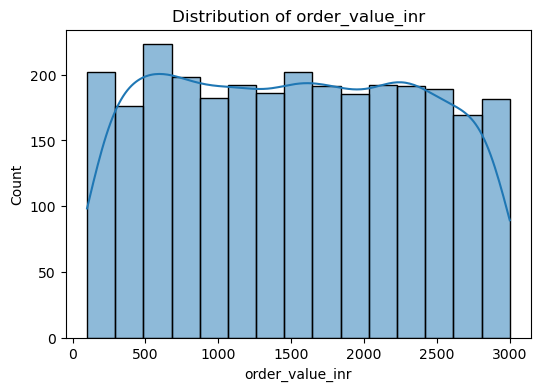

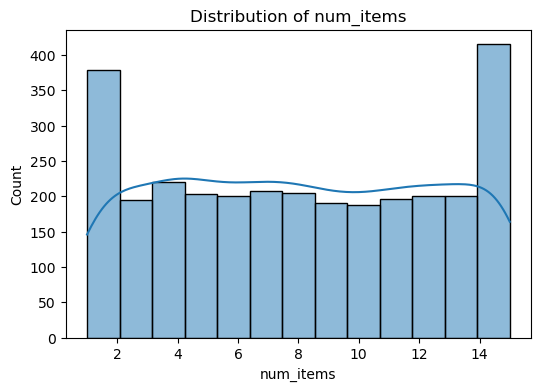

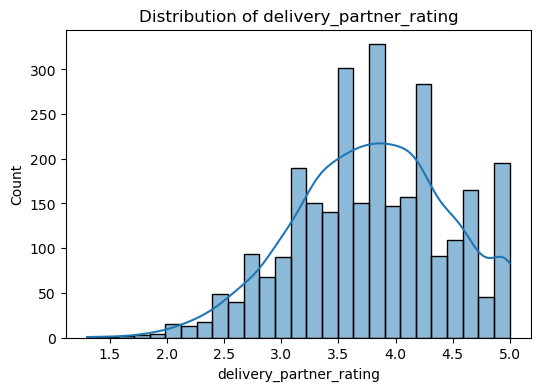

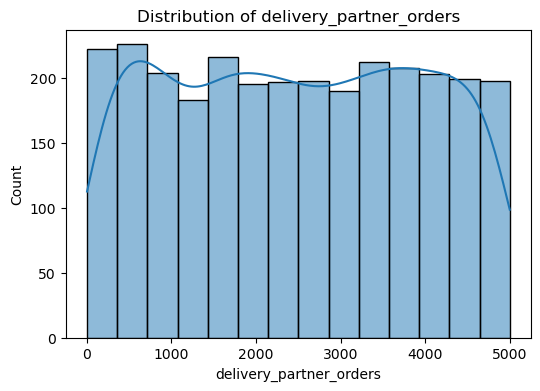

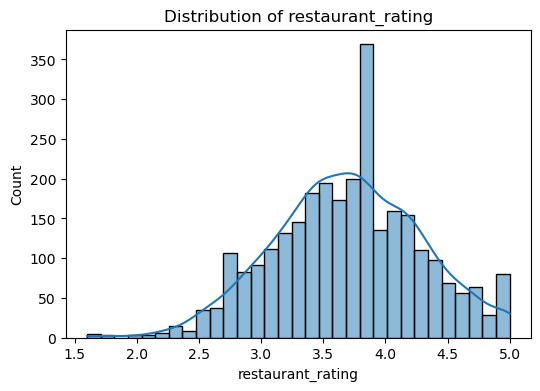

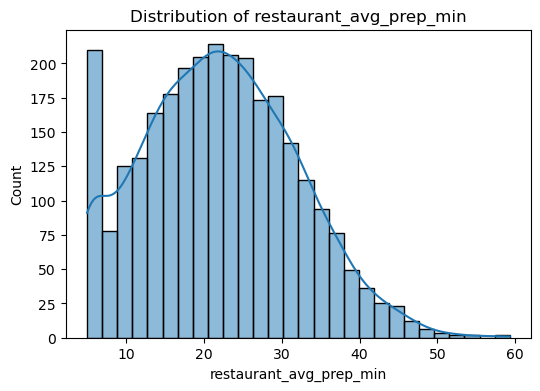

In [9]:
#plotting attribute distribution
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

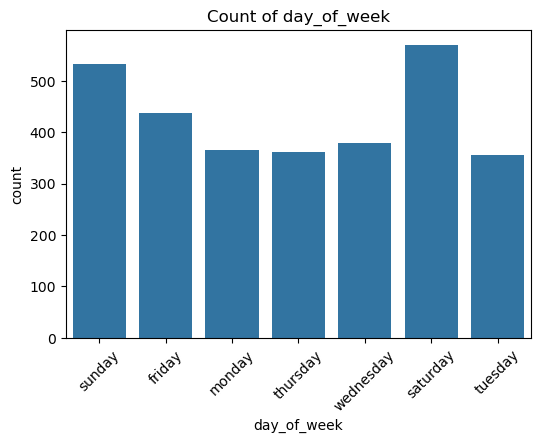

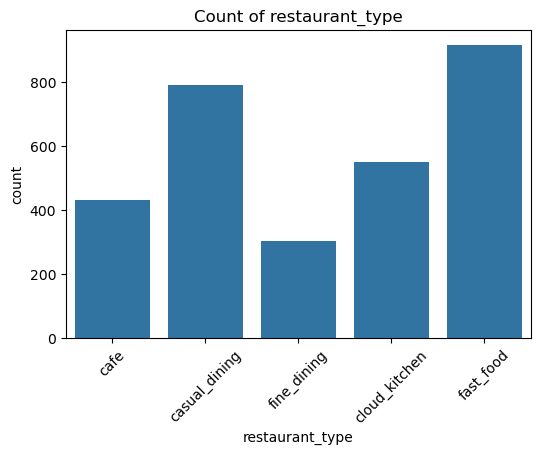

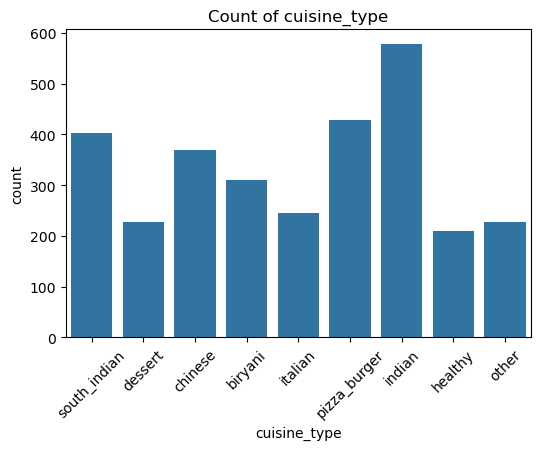

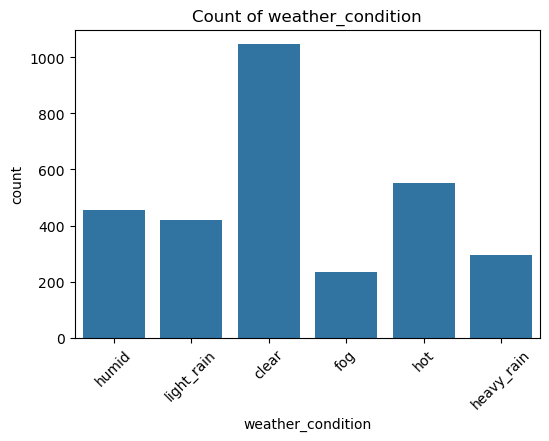

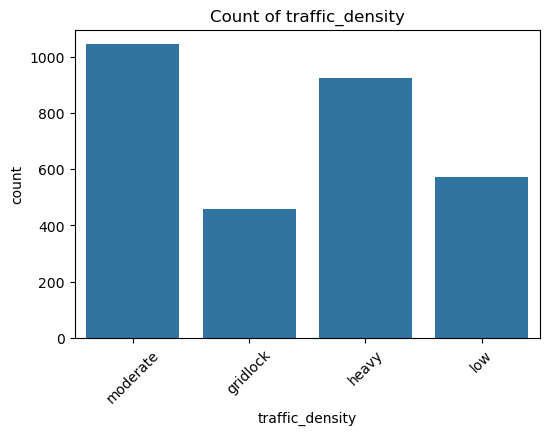

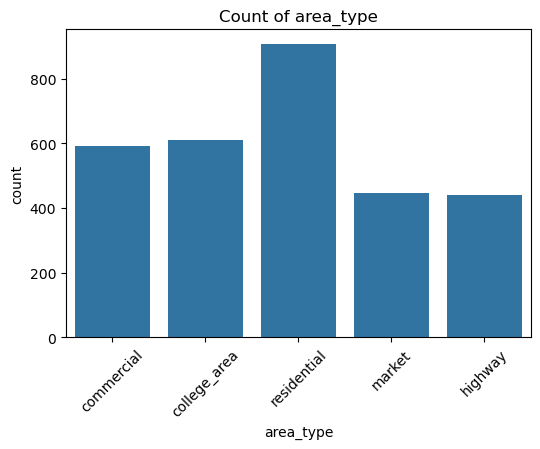

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Checking the missing values
msg_val = 100*(df.isna().sum() / len(df))
print(msg_val)

id                         0.000000
order_hour                 0.000000
day_of_week                0.000000
restaurant_type            0.000000
cuisine_type               0.000000
distance_km                4.500000
estimated_delivery_min     0.000000
order_value_inr            4.700000
num_items                  0.000000
is_peak_hour               0.000000
weather_condition          0.000000
traffic_density            0.000000
delivery_partner_rating    5.033333
delivery_partner_orders    4.966667
restaurant_rating          4.933333
restaurant_avg_prep_min    5.066667
is_promo_order             0.000000
area_type                  0.000000
is_late                    0.000000
dtype: float64


In [12]:
# Checking the duplicate rows
X.duplicated().sum()

0

In [13]:
# Checking the imbalance or not
y.value_counts(normalize=True)*100

is_late
0    60.5
1    39.5
Name: proportion, dtype: float64

In [14]:
# Statstical Summary
X.describe()

,order_hour,distance_km,estimated_delivery_min,order_value_inr,num_items,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min
count,3000.000000,2865.000000,3000.000000,2859.000000,3000.000000,2849.000000,2851.000000,2852.000000,2848.000000
mean,11.435000,7.735567,50.263333,1524.125219,8.048333,3.792804,2471.810593,3.697721,22.002598
std,7.009338,4.243525,23.558869,833.764958,4.312485,0.670758,1458.626419,0.591568,9.857117
min,0.000000,0.500000,10.000000,99.000000,1.000000,1.300000,4.000000,1.600000,5.000000
25%,5.000000,4.000000,29.000000,797.500000,4.000000,3.300000,1190.500000,3.300000,14.700000
50%,11.500000,7.600000,50.500000,1527.000000,8.000000,3.800000,2466.000000,3.700000,21.700000
75%,18.000000,11.500000,71.000000,2239.500000,12.000000,4.300000,3732.500000,4.100000,28.800000
max,23.000000,15.000000,90.000000,2999.000000,15.000000,5.000000,5000.000000,5.000000,59.300000


In [15]:
# numerical features
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print('Numerical Features \n',num_cols)
print('Categorical Features \n',cat_cols)

Numerical Features 
 ['order_hour', 'distance_km', 'estimated_delivery_min', 'order_value_inr', 'num_items', 'delivery_partner_rating', 'delivery_partner_orders', 'restaurant_rating', 'restaurant_avg_prep_min']
Categorical Features 
 ['day_of_week', 'restaurant_type', 'cuisine_type', 'weather_condition', 'traffic_density', 'area_type']


In [16]:
X['area_type'].value_counts()

area_type
residential     907
college_area    612
commercial      593
market          447
highway         441
Name: count, dtype: int64

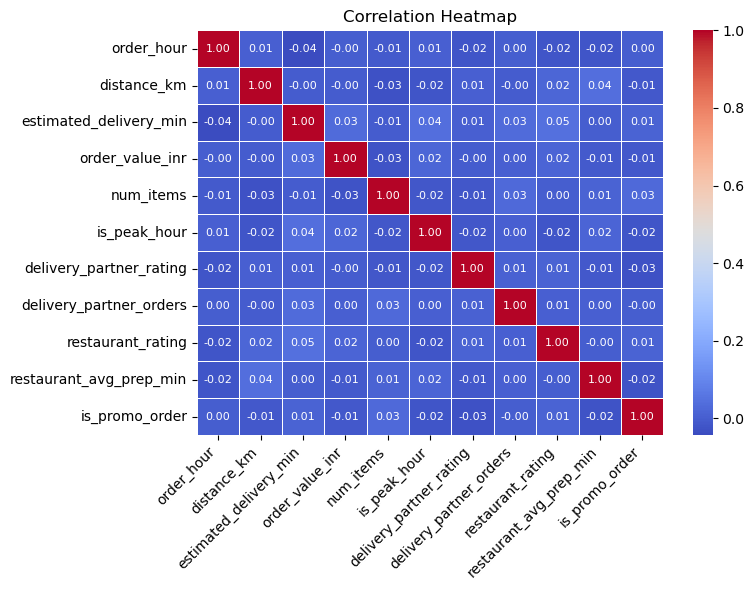

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))  # Increase figure size

corr_matrix = X.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",          # Show only 2 decimal places
    cmap="coolwarm",
    linewidths=0.5,     # Add spacing between cells
    annot_kws={"size":8}  # Reduce annotation size
)

plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.tight_layout()  # Adjust spacing
plt.show()

# Exploratory Data Analysis

##  Does Higher distance_km increase Late ?

In [18]:
df.groupby("is_late")["distance_km"].mean()

is_late
0    7.556369
1    8.010708
Name: distance_km, dtype: float64

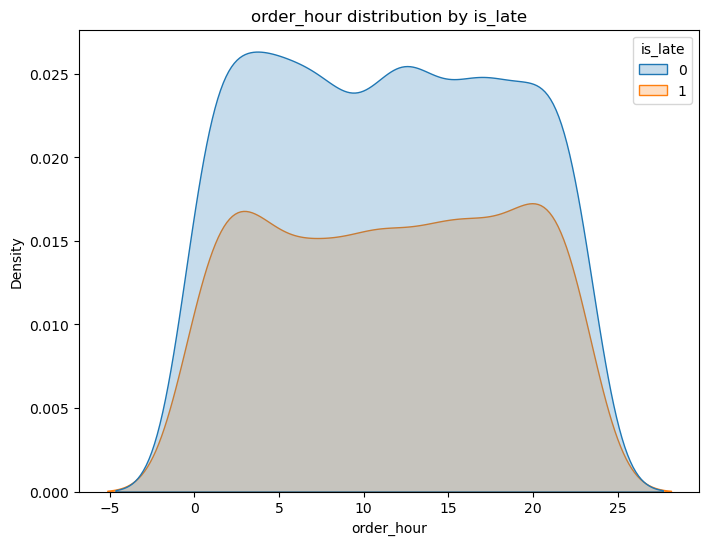

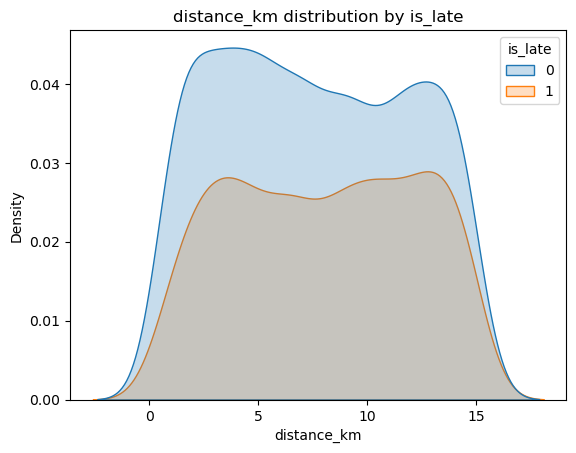

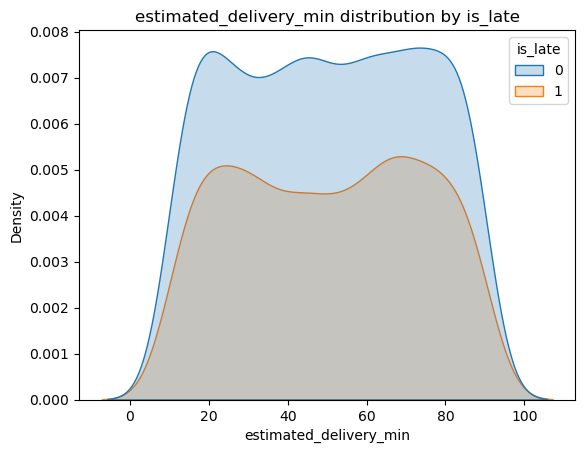

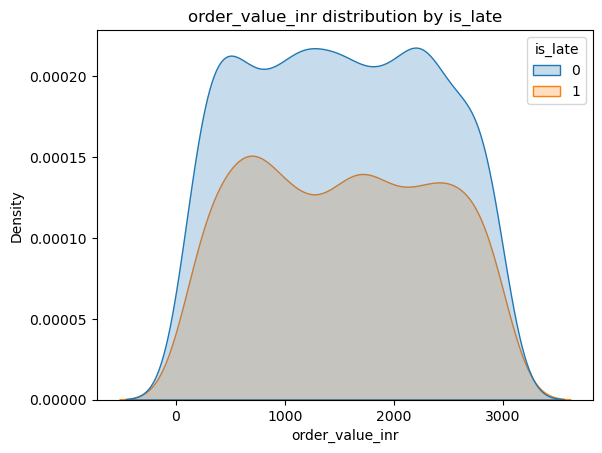

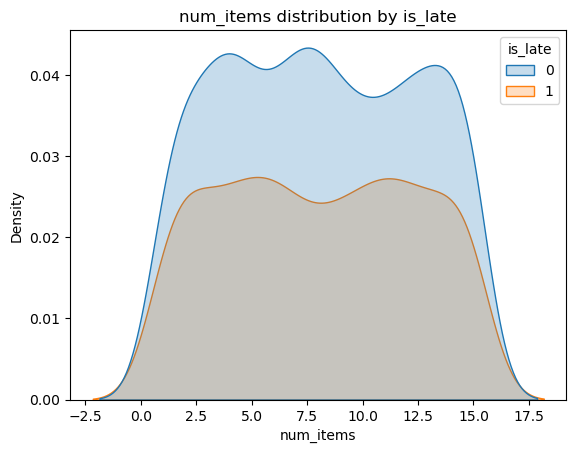

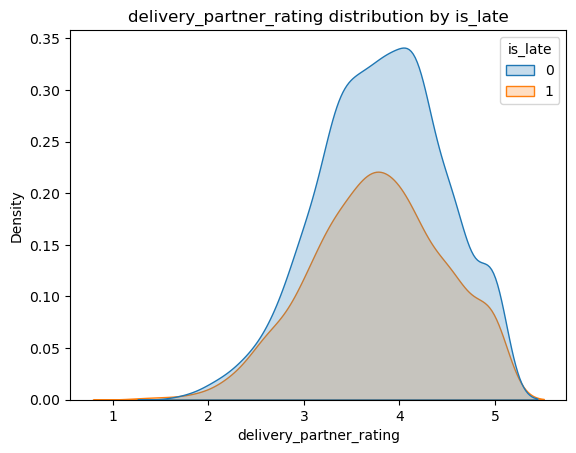

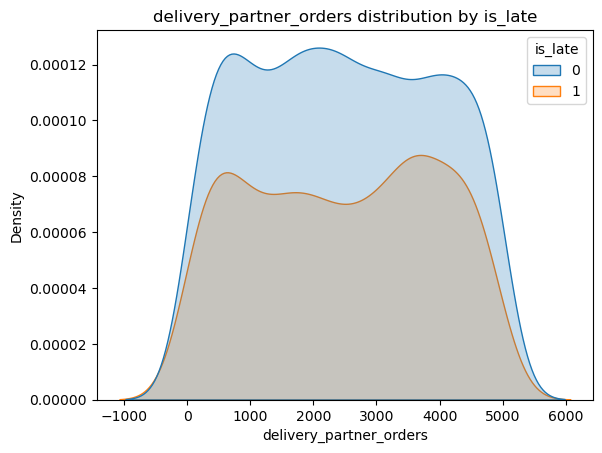

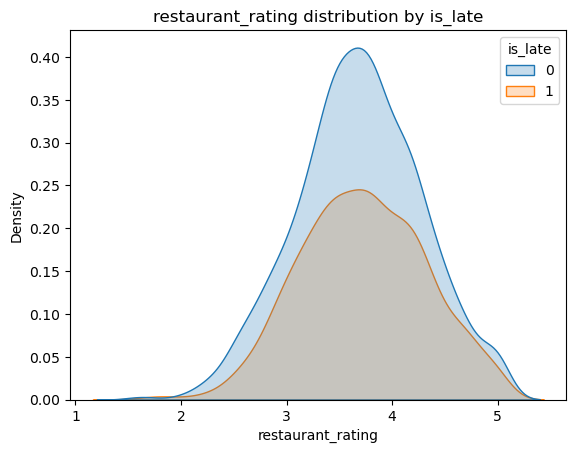

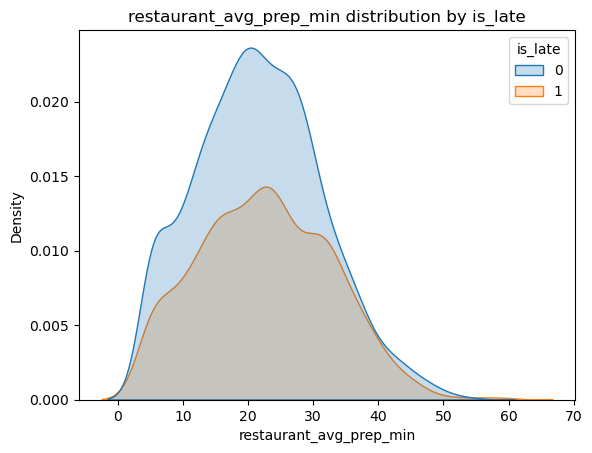

In [32]:
# Check target distribution vs feature distribution
plt.figure(figsize=(8,6))
for col in num_cols:
    sns.kdeplot(data=X, x=col, hue=y, fill=True)
    plt.title(f'{col} distribution by {y.name}')
    plt.show()

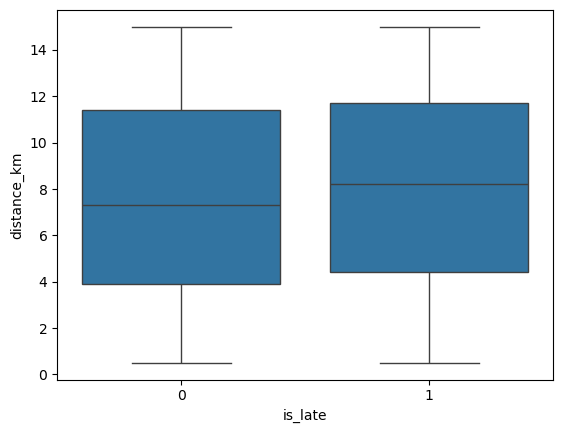

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_late", y="distance_km", data=df)
plt.show()

## Does is_peak_hour Increase Late ?

In [20]:
pd.crosstab(df["is_peak_hour"], df["is_late"], normalize="index")*100

is_late,0,1
is_peak_hour,,
False,63.283273,36.716727
True,55.472404,44.527596


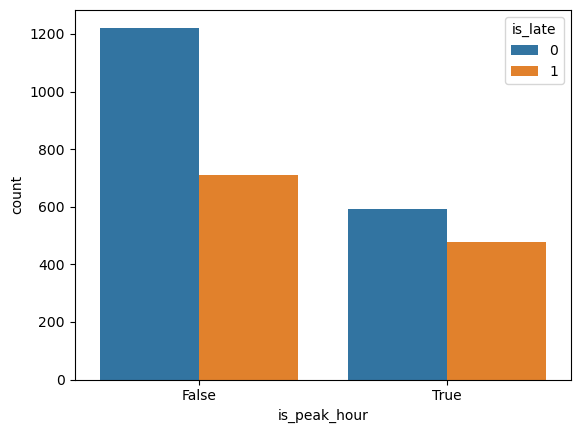

In [149]:
sns.countplot(x="is_peak_hour", hue="is_late", data=df)
plt.show()

## Does Weather Condition Matter ?

In [21]:
pd.crosstab(df["weather_condition"], df["is_late"], normalize="index")*100

is_late,0,1
weather_condition,,
clear,61.986628,38.013372
fog,52.564103,47.435897
heavy_rain,50.680272,49.319728
hot,62.000000,38.000000
humid,63.296703,36.703297
light_rain,63.095238,36.904762


## Does traffic density affect the delivery ?

In [22]:
pd.crosstab(df["traffic_density"], df["is_late"], normalize="index")*100

is_late,0,1
traffic_density,,
gridlock,44.978166,55.021834
heavy,62.270270,37.729730
low,63.286713,36.713287
moderate,64.210526,35.789474


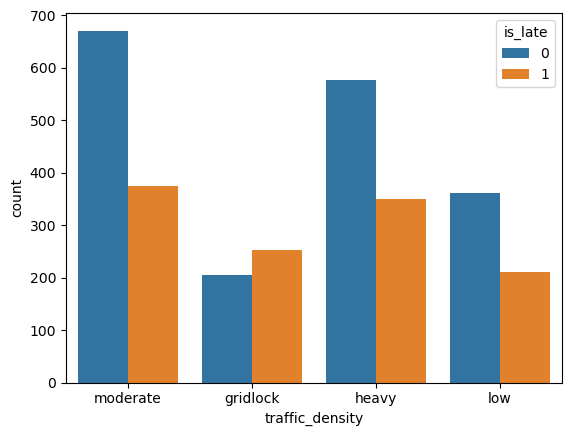

In [23]:
sns.countplot(x="traffic_density", hue="is_late", data=df)
plt.show()

## day_of_week vs is_late

In [24]:
pd.crosstab(df["day_of_week"], df["is_late"], normalize="index")*100

is_late,0,1
day_of_week,,
friday,59.589041,40.410959
monday,58.743169,41.256831
saturday,60.526316,39.473684
sunday,62.406015,37.593985
thursday,55.955679,44.044321
tuesday,63.661972,36.338028
wednesday,61.904762,38.095238


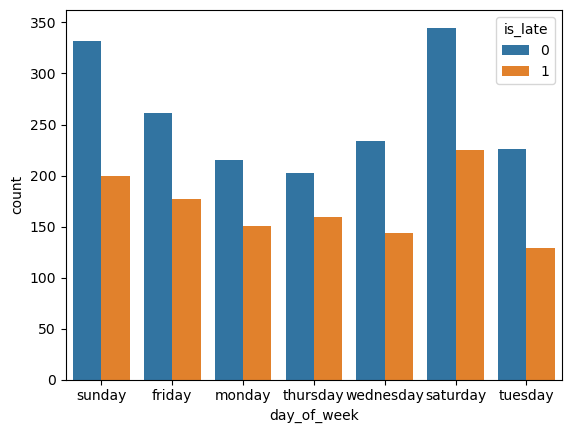

In [25]:
sns.countplot(x="day_of_week", hue="is_late", data=df)
plt.show()

In [26]:
X['order_hour'].unique()

array([ 6, 19, 14, 10,  7, 20, 18, 22, 23,  3,  2, 21,  1, 11,  5,  0, 16,
        9, 15,  4,  8, 17, 13, 12])

# Outlier detection

In [27]:
# Outlier detection
num_cols = ['order_hour', 'distance_km', 'estimated_delivery_min', 'order_value_inr', 'num_items', 'delivery_partner_rating', 'delivery_partner_orders', 'restaurant_rating', 'restaurant_avg_prep_min']
def outlier_percent(col):
    Q1 = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((col < lower) | (col > upper)).sum()
    return (outliers / len(col))*100


for col in num_cols :
    print(col , ':',outlier_percent(X[col]),"%")

order_hour : 0.0 %
distance_km : 0.0 %
estimated_delivery_min : 0.0 %
order_value_inr : 0.0 %
num_items : 0.0 %
delivery_partner_rating : 0.0 %
delivery_partner_orders : 0.0 %
restaurant_rating : 0.0 %
restaurant_avg_prep_min : 0.0 %


In [28]:
# Checking the skewness
for col in num_cols:
    print(f'{col} : {X[col].skew()}')

order_hour : 0.0028553909240680102
distance_km : 0.02989680250043597
estimated_delivery_min : -0.020287788318273887
order_value_inr : 0.0288330895655982
num_items : 0.014983233372706623
delivery_partner_rating : -0.21971118441993315
delivery_partner_orders : 0.0046234913136950165
restaurant_rating : -0.08345722787534596
restaurant_avg_prep_min : 0.2563239438543197


In [29]:
X

,order_hour,day_of_week,restaurant_type,cuisine_type,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,weather_condition,traffic_density,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,is_promo_order,area_type
0,6,sunday,cafe,south_indian,10.7,55,1208.0,8,True,humid,moderate,3.6,3393.0,4.3,23.5,False,commercial
1,19,friday,casual_dining,dessert,1.1,78,172.0,12,True,light_rain,gridlock,2.5,2331.0,4.7,23.8,True,college_area
2,14,sunday,fine_dining,dessert,13.6,14,2314.0,2,True,clear,moderate,4.1,3393.0,3.1,23.0,False,college_area
3,10,monday,cloud_kitchen,south_indian,7.5,70,2754.0,2,True,clear,gridlock,4.6,2618.0,3.8,26.0,False,residential
4,7,thursday,fine_dining,chinese,7.2,47,789.0,9,True,light_rain,heavy,3.9,4121.0,4.4,28.9,False,residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,tuesday,cloud_kitchen,other,3.5,60,741.0,10,True,hot,gridlock,3.8,1676.0,3.2,14.1,False,college_area
2996,14,monday,casual_dining,pizza_burger,14.2,35,538.0,6,False,clear,moderate,4.6,1778.0,4.0,41.3,True,residential
2997,17,wednesday,cafe,other,0.8,71,518.0,5,True,heavy_rain,heavy,2.4,253.0,3.8,13.3,False,market
2998,23,friday,casual_dining,italian,14.5,70,1445.0,5,True,hot,heavy,4.2,3167.0,3.7,15.8,True,residential


# Feature Engineering 

In [159]:
train_median = X["distance_km"].median()

X["is_gridlock"] = (X["traffic_density"] == "gridlock").astype(int)
X["bad_weather"] = X["weather_condition"].isin(["fog", "heavy_rain"]).astype(int)
X["high_risk_time"] = (
    (X["is_peak_hour"] == True) |
    (X["day_of_week"].isin(["thursday", "monday"]))
).astype(int)
X["gridlock_long"] = (
    (X["traffic_density"] == "gridlock") &
    (X["distance_km"] > X["distance_km"].median())
).astype(int)
traffic_risk = {
    "gridlock": 0.55,
    "heavy": 0.38,
    "low": 0.37,
    "moderate": 0.36
}

X["traffic_risk_score"] = X["traffic_density"].map(traffic_risk)

In [160]:
X.shape

(3000, 22)

# Updating Numerical Coulumns

In [ ]:
new_features = [
    "is_gridlock",
    "bad_weather",
    "high_risk_time",
    "gridlock_long",
    "traffic_risk_score"
]

num_cols = num_cols + new_features
num_cols = list(set(num_cols))


# Train-test split

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Random Forest model

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

rf_model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

# Hyperparamter tuning 

In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__n_estimators": [300, 500],
    "classifier__max_depth": [4, 5, 6],
    "classifier__min_samples_split": [10, 20],
    "classifier__min_samples_leaf": [5, 10]
}

grid = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Macro F1 (Train Only):", grid.best_score_)

best_rf = grid.best_estimator_

Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best CV Macro F1 (Train Only): 0.5825996448177986


# Threshold tuning 

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

y_val_prob = best_rf.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.2, 0.8, 0.01)

best_threshold = 0
best_score = 0

for t in thresholds:
    y_pred = (y_val_prob > t).astype(int)
    f1 = f1_score(y_val, y_pred, average="macro")

    if f1 > best_score:
        best_score = f1
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Best Validation Macro F1:", best_score)

Best Threshold: 0.49000000000000027
Best Validation Macro F1: 0.5713265063110264


In [166]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def print_metrics(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} Metrics =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Macro Precision:", precision_score(y_true, y_pred, average="macro"))
    print("Macro Recall:", recall_score(y_true, y_pred, average="macro"))
    print("Macro F1:", f1_score(y_true, y_pred, average="macro"))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Train predictions
y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_prob > best_threshold).astype(int)

# Validation predictions
y_val_pred = (y_val_prob > best_threshold).astype(int)

print_metrics("Train", y_train, y_train_pred, y_train_prob)
print_metrics("Validation", y_val, y_val_pred, y_val_prob)


===== Train Metrics =====
Accuracy: 0.7079166666666666
Macro Precision: 0.6939173152287906
Macro Recall: 0.6914208250514349
Macro F1: 0.6925231251888149
ROC-AUC: 0.7583523671699737
Confusion Matrix:
 [[1118  334]
 [ 367  581]]

===== Validation Metrics =====
Accuracy: 0.595
Macro Precision: 0.5726083226083226
Macro Recall: 0.570823307877393
Macro F1: 0.5713265063110264
ROC-AUC: 0.6039683369948042
Confusion Matrix:
 [[249 114]
 [129 108]]


# Final Training on Full data

In [167]:
best_rf.fit(X, y)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


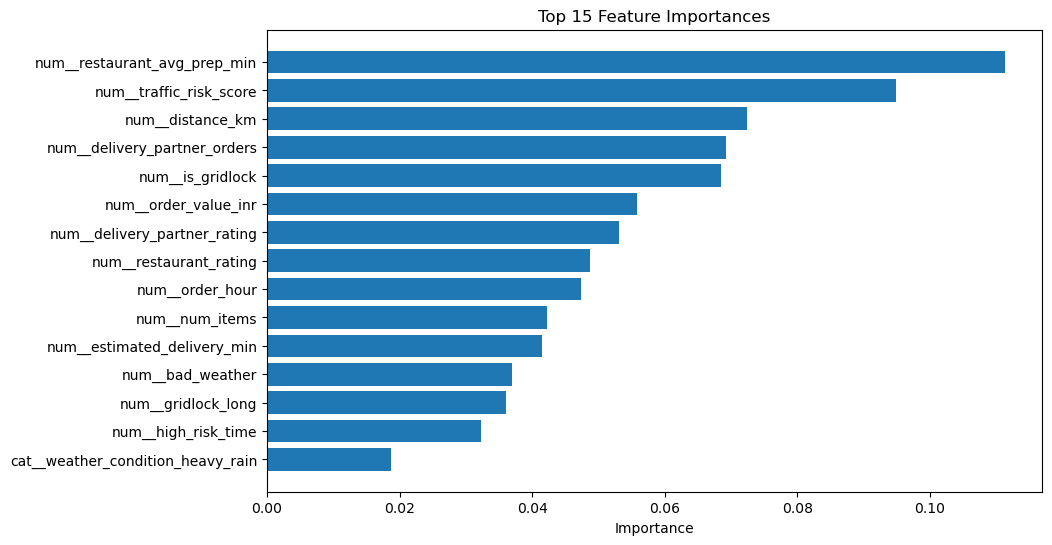

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1️ Extract trained RandomForest model
rf = best_rf.named_steps["classifier"]

# 2️ Get feature names after preprocessing
feature_names = best_rf.named_steps["preprocessing"].get_feature_names_out()

# 3️ Get importance values
importances = rf.feature_importances_

# 4️ Create dataframe
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})
# 5️ Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)

# 6️ Plot Top 15 Features
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_df["feature"].head(15)[::-1],
    feature_importance_df["importance"].head(15)[::-1]
)
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.show()

In [190]:
X_test = pd.read_csv('D:/Spech Challenge/spec2model/problems/PROBLEM_A/test_A.csv')

In [191]:
X_test["is_gridlock"] = (X_test["traffic_density"] == "gridlock").astype(int)

X_test["bad_weather"] = X_test["weather_condition"].isin(
    ["fog", "heavy_rain"]
).astype(int)

X_test["high_risk_time"] = (
    (X_test["is_peak_hour"] == True) |
    (X_test["day_of_week"].isin(["thursday", "monday"]))
).astype(int)

X_test["gridlock_long"] = (
    (X_test["traffic_density"] == "gridlock") &
    (X_test["distance_km"] > train_median)
).astype(int)

X_test["traffic_risk_score"] = X_test["traffic_density"].map(traffic_risk)

# prediction and Submission

In [193]:
# Predict probabilities
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Apply threshold
y_test_pred = (y_test_prob > best_threshold).astype(int)

# Convert 0/1 to required labels
y_test_label = np.where(y_test_pred == 1, "late", "on_time")

# Create submission dataframe
submission = pd.DataFrame({
    "id": X_test["id"],
    "prediction": y_test_label
})

# Save file
submission.to_csv("submission.csv", index=False)